<a href="https://colab.research.google.com/github/nouran551/hard-hat-detection/blob/master/hard__hat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install object-detection-fastai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import csv
import random
from google.colab import drive
 
 
import subprocess
 
from tqdm.notebook import tqdm
from xml.etree.ElementTree import parse
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.image as immg
from fastai.vision import *
from fastai import *
 
from pathlib import Path
from fastai.callbacks import *
from sklearn.model_selection import StratifiedKFold,KFold
 
from object_detection_fastai.helper.object_detection_helper import *
from object_detection_fastai.loss.RetinaNetFocalLoss import RetinaNetFocalLoss
from object_detection_fastai.models.RetinaNet import RetinaNet
from object_detection_fastai.callbacks.callbacks import BBLossMetrics, BBMetrics, PascalVOCMetric

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFMo58_hdUckAuo1DmxAkEXWoS0EV4LJVzi2KzDMLCyTfpROFTrm5s
Mounted at /content/gdrive


In [ ]:
drive.mount('/content/gdrive')
path='/content/gdrive/My Drive/Hard hat detection challenge/_annotations.csv'
path_img='/content/gdrive/My Drive/Hard hat detection challenge/train'
path_all='/content/gdrive/My Drive/Hard hat detection challenge'
path_test = '/content/gdrive/My Drive/Hard hat detection challenge/test'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
annotation= pd.read_csv(path)
annotation.shape

(20231, 8)

In [ ]:
annotation.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,301,100,330,135
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,340,121,370,158
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,199,111,223,137
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,277,109,295,132
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,154,116,174,141


In [ ]:
df = annotation.drop(['width','height'], axis = 1)
df.head()

,filename,class,xmin,ymin,xmax,ymax
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,head,301,100,330,135
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,head,340,121,370,158
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,head,199,111,223,137
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,head,277,109,295,132
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,head,154,116,174,141


In [ ]:
df = df [['filename','xmin','ymin','xmax','ymax','class']]
df.head()

,filename,xmin,ymin,xmax,ymax,class
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,301,100,330,135,head
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,340,121,370,158,head
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,199,111,223,137,head
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,277,109,295,132,head
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,154,116,174,141,head


In [ ]:
arr = df["filename"].to_numpy()
print(arr)
arr.shape

['004858_jpg.rf.002ab521984d81c7400faa6f916f5a01.jpg' '004858_jpg.rf.002ab521984d81c7400faa6f916f5a01.jpg'
 '004858_jpg.rf.002ab521984d81c7400faa6f916f5a01.jpg' '004858_jpg.rf.002ab521984d81c7400faa6f916f5a01.jpg' ...
 '002219_jpg.rf.ff42125c486dacdf0b881197b5500215.jpg' '002219_jpg.rf.ff42125c486dacdf0b881197b5500215.jpg'
 '004208_jpg.rf.ff41745f0340f82a1b3d76d669e084a7.jpg' '004208_jpg.rf.ff41745f0340f82a1b3d76d669e084a7.jpg']


(20231,)

In [ ]:
unique_arr = np.unique(arr)
print(unique_arr)
unique_arr.shape

['000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg' '000002_jpg.rf.85b55e30b8ce745e3c16966991a38018.jpg'
 '000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9.jpg' '000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce.jpg' ...
 '005294_jpg.rf.5b6845af071b28aed341881f9ee64135.jpg' '005295_jpg.rf.3bdf25c46825aa098a0754b80992369a.jpg'
 '005296_jpg.rf.a9efe8ca20f1e8fd8052eb63e7a73859.jpg' '005297_jpg.rf.84c9d79a97d377470c9aae94b9cd2274.jpg']


(5269,)

In [ ]:
file = unique_arr.tolist()
print(file)

['000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg', '000002_jpg.rf.85b55e30b8ce745e3c16966991a38018.jpg', '000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9.jpg', '000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce.jpg', '000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818.jpg', '000006_jpg.rf.6abcef9263250fa3bae58b72e8987b2b.jpg', '000007_jpg.rf.8e98fb789dfc011fb526ce49daf8da31.jpg', '000008_jpg.rf.e02009e902c74a6a08eee7ac6ef77bcb.jpg', '000009_jpg.rf.2b9c37488ee6a4dcc1193aaac99b9f55.jpg', '000010_jpg.rf.ff3d356d21409f8e9fe185536c4ecad9.jpg', '000011_jpg.rf.61884ddd74876b2c5be509879237cfe6.jpg', '000012_jpg.rf.2e49c7cac1f974388e32964f138453ca.jpg', '000013_jpg.rf.44ffce5c7121128de673c897043586c9.jpg', '000014_jpg.rf.48b4f5a271e853226260c311fa524ff5.jpg', '000015_jpg.rf.33fabf5a1aaea1c89da212e51ebc2e41.jpg', '000016_jpg.rf.80946bcc8f5f0a9f13c94fce3439dfad.jpg', '000017_jpg.rf.c6315f3e2f8de22636325c8eff927a44.jpg', '000018_jpg.rf.aa084e30d2b7507b19fc60cb45f9c62d.jpg', '000019_jpg.rf.60e6cb5bcf90

In [ ]:
unique_arr.shape

(5269,)

In [ ]:
labels_final = []
object_ymin_final=[]
object_xmax_final=[]
object_ymax_final=[]
object_xmin_final=[]


for i in tqdm(range(len(file))):
    labels = []
    object_xmin=[]
    object_ymin=[]
    object_xmax=[]
    object_ymax=[]

    for j in df.index:


        if df['filename'][j] == file[i] :
            object_xmin.append(df['xmin'][j])
            object_xmax.append(df['xmax'][j])
            object_ymin.append(df['ymin'][j])
            object_ymax.append(df['ymax'][j])
            labels.append(df['class'][j]) 
    
    object_xmin_final.append(object_xmin)
    object_xmax_final.append(object_xmax)
    object_ymin_final.append(object_ymin)
    object_ymax_final.append(object_ymax)
    labels_final.append(labels)
             

In [ ]:
print(len(object_xmin_final))

5269


In [ ]:
object_xmin_final

[[178, 111],
 [272, 141],
 [315, 175, 121, 242],
 [289, 320, 390, 268, 249, 374],
 [23, 252],
 [187, 154, 131, 9, 90],
 [280, 8, 115, 375, 412, 336, 247, 197, 174, 477],
 [295, 220, 189, 240, 313, 337, 152],
 [300],
 [439, 321, 211, 115],
 [207,
  43,
  14,
  25,
  81,
  100,
  112,
  144,
  193,
  184,
  238,
  254,
  268,
  346,
  298,
  339,
  363],
 [75, 284, 381, 242],
 [0],
 [437, 326, 228, 372, 326],
 [467, 321],
 [129],
 [150],
 [128],
 [254, 107, 181, 145, 303],
 [95, 149],
 [71],
 [257, 77, 197, 224, 167, 113, 158],
 [1,
  232,
  161,
  305,
  339,
  257,
  203,
  462,
  392,
  386,
  159,
  414,
  417,
  221,
  453,
  488],
 [81, 314, 193, 230, 361, 160, 201, 257, 284, 374],
 [64, 204, 340],
 [95, 167],
 [157, 214, 275, 376, 320],
 [257, 93, 133, 178, 224, 327],
 [24, 123],
 [58, 305, 280, 214, 172, 102, 124, 148, 38],
 [160, 276, 291],
 [227, 51],
 [33, 20],
 [194],
 [316, 393, 160],
 [48, 19, 69, 173],
 [47],
 [43, 244],
 [292],
 [139, 179, 146, 172, 145, 137],
 [46, 118, 

In [ ]:
labels_final

[['helmet', 'helmet'],
 ['helmet', 'helmet'],
 ['helmet', 'helmet', 'helmet', 'helmet'],
 ['head', 'head', 'head', 'head', 'head', 'head'],
 ['helmet', 'helmet'],
 ['head', 'head', 'head', 'head', 'head'],
 ['helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet'],
 ['helmet', 'helmet', 'helmet', 'helmet', 'helmet', 'helmet', 'head'],
 ['helmet'],
 ['helmet', 'helmet', 'helmet', 'helmet'],
 ['helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'head',
  'helmet',
  'helmet',
  'helmet'],
 ['helmet', 'helmet', 'helmet', 'helmet'],
 ['helmet'],
 ['helmet', 'helmet', 'helmet', 'helmet', 'helmet'],
 ['helmet', 'helmet'],
 ['helmet'],
 ['helmet'],
 ['helmet'],
 ['head', 'head', 'head', 'head', 'head'],
 ['helmet', 'helmet'],
 ['helmet'],
 ['helmet', 'helmet', 'helmet', 'helmet', 'helmet', 'helmet', 'helmet'],
 ['helmet',
  'head'

In [ ]:
print(len(labels_final))

5269


In [ ]:
dframe = pd.DataFrame({'file_name':unique_arr,'xmin':object_xmin_final,'ymin':object_ymin_final,
                                   'xmax':object_xmax_final,'ymax':object_ymax_final,'labels':labels_final})

In [ ]:
dframe

,file_name,xmin,ymin,xmax,ymax,labels
0,000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805...,"[178, 111]","[84, 144]","[230, 134]","[143, 174]","[helmet, helmet]"
1,000002_jpg.rf.85b55e30b8ce745e3c16966991a38018...,"[272, 141]","[53, 83]","[325, 181]","[111, 131]","[helmet, helmet]"
2,000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9...,"[315, 175, 121, 242]","[3, 152, 8, 46]","[372, 204, 157, 269]","[47, 189, 46, 79]","[helmet, helmet, helmet, helmet]"
3,000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce...,"[289, 320, 390, 268, 249, 374]","[77, 61, 93, 91, 104, 94]","[326, 375, 440, 298, 275, 407]","[132, 136, 155, 132, 138, 140]","[head, head, head, head, head, head]"
4,000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818...,"[23, 252]","[54, 84]","[111, 317]","[149, 158]","[helmet, helmet]"
...,...,...,...,...,...,...
5264,005293_jpg.rf.5367c5eb913cdfb77705f1c1c2553cd2...,"[19, 198, 284, 150, 354, 103, 74, 215, 261, 94]","[60, 81, 80, 64, 63, 68, 77, 63, 63, 52]","[60, 243, 324, 191, 398, 152, 113, 250, 291, 127]","[109, 138, 135, 117, 118, 133, 127, 100, 94, 81]","[helmet, helmet, helmet, helmet, helmet, helme..."
5265,005294_jpg.rf.5b6845af071b28aed341881f9ee64135...,"[307, 131, 295]","[60, 127, 256]","[362, 167, 321]","[107, 174, 286]","[helmet, helmet, helmet]"
5266,005295_jpg.rf.3bdf25c46825aa098a0754b80992369a...,"[147, 228]","[113, 155]","[194, 266]","[171, 204]","[helmet, helmet]"
5267,005296_jpg.rf.a9efe8ca20f1e8fd8052eb63e7a73859...,"[104, 234, 418, 328, 30, 157]","[127, 112, 107, 123, 135, 141]","[142, 271, 463, 365, 76, 192]","[175, 159, 158, 168, 186, 185]","[head, head, head, head, head, head]"


In [ ]:
def image_lbl(dframe):
    hat2bbox = {}
    for i in tqdm(range(dframe.shape[0])):
        bbox = []
        lbl =[]
        title = []
        a = dframe.iloc[i][1:-1].values
        l = dframe.iloc[i][-1]
        for j in range(len(l)):
            bbx = [x[j] for x in a]
            if l[j]!='person':
                bbx = [bbx[1],bbx[0],bbx[3],bbx[2]]
                lbl.append(bbx)
                title.append(l[j])
        bbox.append(lbl)
        bbox.append(title)
        hat2bbox[dframe.iloc[i][0]] = bbox
    return hat2bbox

In [ ]:
hat2bbox = image_lbl(dframe)

In [ ]:
hat2bbox

{'000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg': [[[84, 178, 143, 230],
   [144, 111, 174, 134]],
  ['helmet', 'helmet']],
 '000002_jpg.rf.85b55e30b8ce745e3c16966991a38018.jpg': [[[53, 272, 111, 325],
   [83, 141, 131, 181]],
  ['helmet', 'helmet']],
 '000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9.jpg': [[[3, 315, 47, 372],
   [152, 175, 189, 204],
   [8, 121, 46, 157],
   [46, 242, 79, 269]],
  ['helmet', 'helmet', 'helmet', 'helmet']],
 '000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce.jpg': [[[77, 289, 132, 326],
   [61, 320, 136, 375],
   [93, 390, 155, 440],
   [91, 268, 132, 298],
   [104, 249, 138, 275],
   [94, 374, 140, 407]],
  ['head', 'head', 'head', 'head', 'head', 'head']],
 '000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818.jpg': [[[54, 23, 149, 111],
   [84, 252, 158, 317]],
  ['helmet', 'helmet']],
 '000006_jpg.rf.6abcef9263250fa3bae58b72e8987b2b.jpg': [[[84, 187, 135, 218],
   [82, 154, 141, 195],
   [100, 131, 140, 160],
   [68, 9, 141, 75],
   [105, 90, 134, 119]]

In [ ]:
def show_sam(n):
    name = df.iloc[n][0] 
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(immg.imread(os.path.join(path_img,name)))
    B = hat2bbox[name]
    for l,bbox in zip(B[1],B[0]):
        bbox = [bbox[1],bbox[0],bbox[3],bbox[2]]
        bbox[2] = abs(bbox[0]-bbox[2])
        bbox[3] = abs(bbox[1]-bbox[3])
        draw_rect(ax,bbox,text=l)
    plt.axis('off')

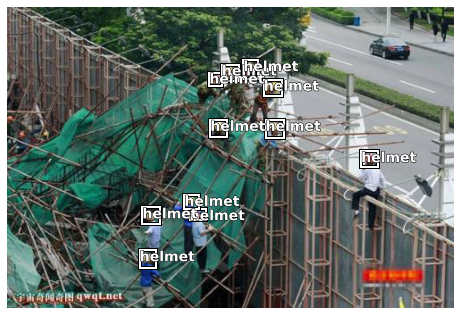

In [ ]:
show_sam(random.randint(0,5268))   #randint(start, end)


create Data Batch

In [ ]:
get_y_func = lambda o: hat2bbox[Path(o).name] 

In [ ]:
tfms = 5
size = 512

In [ ]:
data = (ObjectItemList.from_df(dframe ,path_all, folder = 'train' ,cols='file_name')
        #Where are the images? ->
        .split_by_rand_pct()                          
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func on the file name of the data
        .transform(size=size,tfm_y=True)
        #Data augmentation? -> Standard transforms; also transform the label images
        .databunch(bs=8, collate_fn=bb_pad_collate))  

/usr/local/lib/python3.6/dist-packages/fastai/vision/data.py:361: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  if len((labels - self.pad_idx).nonzero()) == 0: return


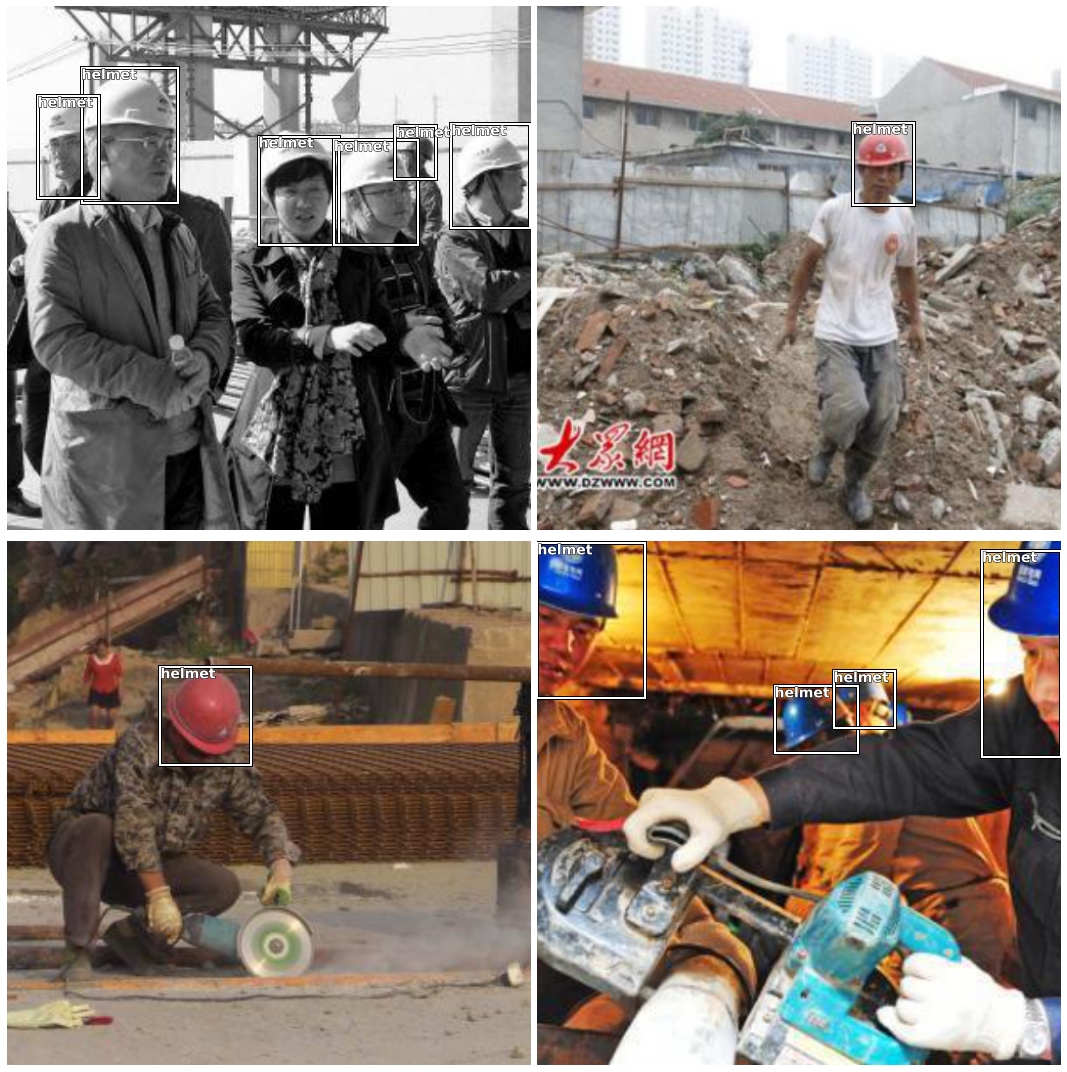

In [ ]:
data.show_batch(rows=2,  figsize=(15,15))

In [ ]:
len(data.train_ds),len(data.valid_ds),data.classes

(4216, 1053, ['background', 'head', 'helmet'])

In [ ]:
anchors = create_anchors(sizes=[(32,32)], ratios=[1], scales=[0.3, 0.6, 1.2, 2, 2.8, 3.4,])

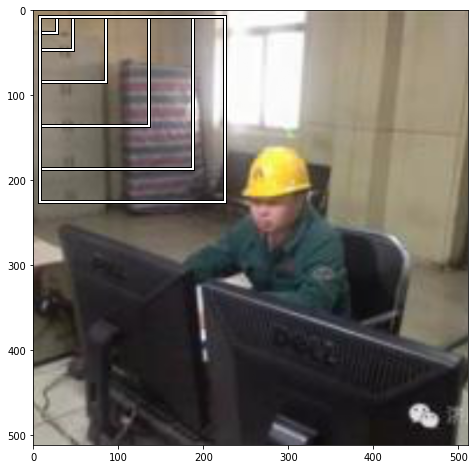

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(image2np(data.valid_ds[0][0].data))

for i, bbox in enumerate(anchors[:6]):
    bb = bbox.numpy()
    x = (bb[0] + 1) * size / 2 
    y = (bb[1] + 1) * size / 2 
    w = bb[2] * size / 2
    h = bb[3] * size / 2
    
    rect = [x,y,w,h]
    draw_rect(ax,rect)

In [ ]:
len(anchors)


6144

Now create the network. Note that for this step, internet access is required, since fast.ai wants to download the pre-trained weights for the ResNet18 stem.

In [ ]:
n_classes = data.train_ds.c

crit = RetinaNetFocalLoss(anchors)

encoder = create_body(models.resnet18, True, -2)
model = RetinaNet(encoder, n_classes=data.train_ds.c, n_anchors=6, sizes=[32], chs=32, final_bias=-4., n_conv=3)
voc = PascalVOCMetric(anchors, size, [i for i in data.train_ds.y.classes[1:]])
learn = Learner(data, model, 
                loss_func=crit, 
                callback_fns=[BBMetrics],
                metrics=[voc],
                model_dir='/content/gdrive/My Drive/Hard hat detection challenge')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.split([model.encoder[6], model.c5top5])
learn.freeze_to(-2)

In [ ]:
gc.collect()

13614

epoch,train_loss,valid_loss,pascal_voc_metric,BBloss,focal_loss,AP-head,AP-helmet,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


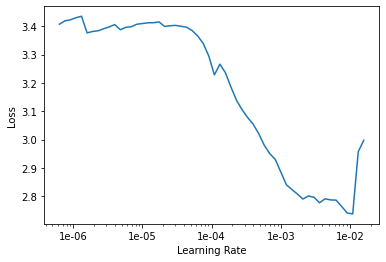

In [ ]:
learn.lr_find()
learn.recorder.plot()


the loss was very good starting from 1e-03

In [ ]:
learn.fit_one_cycle(3, 1e-3 , callbacks = [ SaveModelCallback(learn, every ='improvement', monitor = 'AP-helmet', name = 'best_model' ) ] )

epoch,train_loss,valid_loss,pascal_voc_metric,BBloss,focal_loss,AP-head,AP-helmet,time
0,0.659219,0.575948,0.432948,0.214494,0.361454,0.197951,0.667946,1:17:47
1,0.482446,0.399122,0.605160,0.142716,0.256405,0.533626,0.676694,1:17:41
2,0.227161,0.285118,0.645141,0.116410,0.168708,0.575074,0.715209,1:17:58


Better model found at epoch 0 with AP-helmet value: 0.6679455737564131.
Better model found at epoch 1 with AP-helmet value: 0.6766941561051779.
Better model found at epoch 2 with AP-helmet value: 0.71520857868818.


In [ ]:
learn.load('best_model');
learn.export('/content/gdrive/My Drive/Hard hat detection challenge/safetyHelmet.pkl');

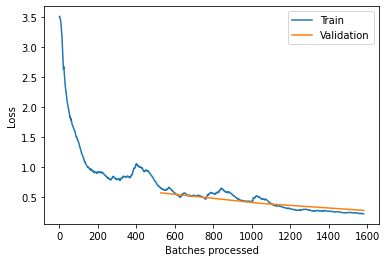

In [ ]:
learn.recorder.plot_losses()


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, callbacks = [SaveModelCallback(learn, every ='improvement', monitor ='AP-helmet', name ='best_model_ft')] )

In [ ]:
learn.load('best_model_ft');
learn.export('/content/gdrive/My Drive/Hard hat detection challenge/safetyHelmet_ft.pkl');

In [ ]:
show_results_side_by_side(learn, anchors, detect_thresh=0.5, nms_thresh=0.1, image_count=4)

In [ ]:
file = '/kaggle/working/safetyHelmet_ft.pkl' 
learn = load_learner(path_learner, file, test = SegmentationItemList.from_folder('/content/gdrive/My Drive/Hard hat detection challenge/test')) 
preds = learn.get_preds(ds_type=DatasetType.Test)